### DV1597 Exercise 3
Tobias Gustafsson
***

In [62]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb
import numpy as np

### 1. Provide answers

### Manhattan dataset

**Question 1: Where in Manhattan is the most/least expensive real estate located?**

Loading the dataset and removing whitespace and instances where sale price is 0:

In [63]:
df_original = pd.read_excel('rollingsales_manhattan.xls', header=4)

df = df_original.copy()
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].str.strip()
df.drop(df[df['SALE PRICE']==0].index, inplace=True)

### Mean and median calculation


To determine where the most/least expensive real estate is located we calculate the mean sale price for each neighborhood in Manhattan.

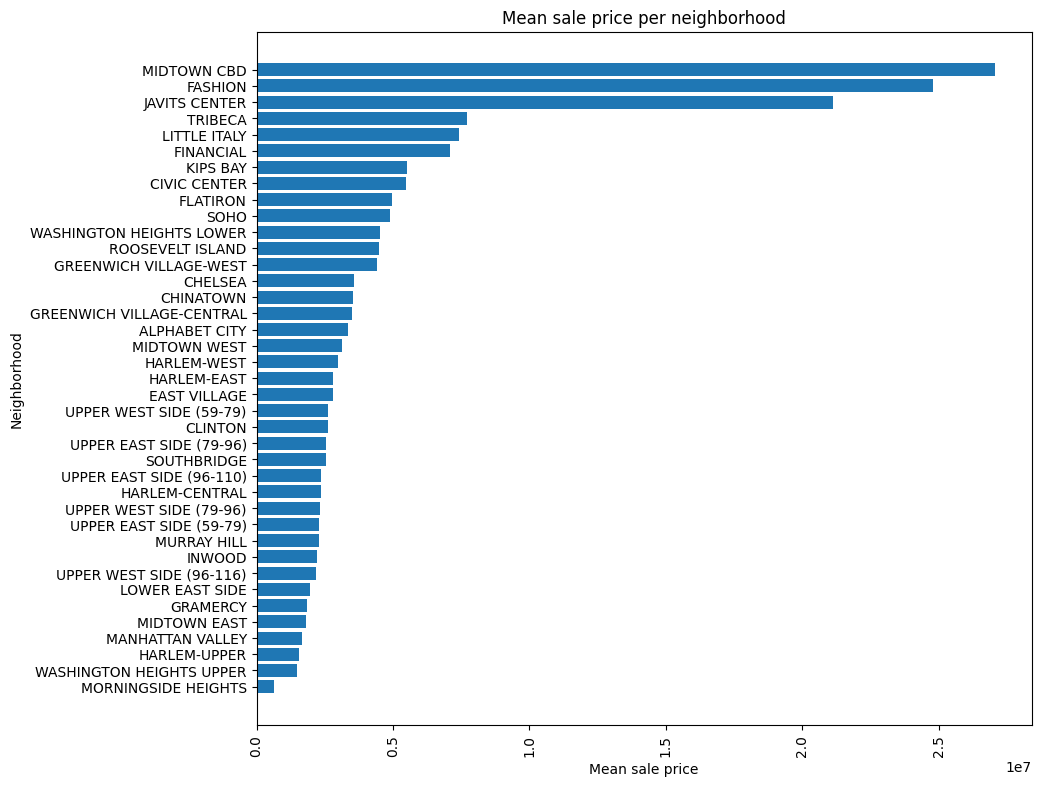

In [64]:
mean_values = df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()
mean_values = mean_values.sort_values('SALE PRICE', ascending=True)

fig = mpl.figure(figsize=(10, 9))
ax = fig.add_subplot(1,1,1)
mpl.xticks(rotation=90)
ax.barh(mean_values['NEIGHBORHOOD'],mean_values['SALE PRICE'])

ax.set_xlabel('Mean sale price')
ax.set_ylabel('Neighborhood')
ax.set_title('Mean sale price per neighborhood')
mpl.show()

The 3 neighborhoods with highest mean sale price is Midtown CBD, Fashion and Javits Center. The 3 neighborhoods with the lowest mean sale price is Harlem-upper, Washington Heights upper and Morningsside heights.

### Median sale price

We calculate the median sale price for each neighborhood.

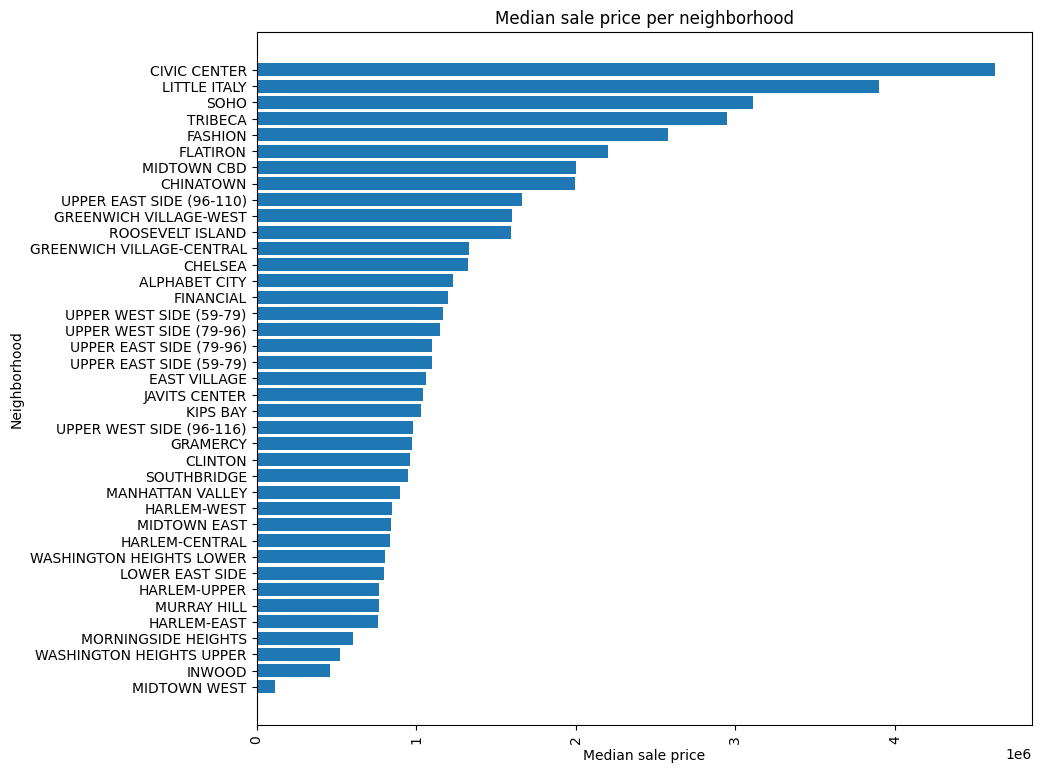

In [65]:
median_values = df.groupby('NEIGHBORHOOD')['SALE PRICE'].median().reset_index()
median_values = median_values.sort_values('SALE PRICE', ascending=True)

fig = mpl.figure(figsize=(10, 9))
ax = fig.add_subplot(1,1,1)
mpl.xticks(rotation=90)
ax.barh(median_values['NEIGHBORHOOD'],median_values['SALE PRICE'])

ax.set_xlabel('Median sale price')
ax.set_ylabel('Neighborhood')
ax.set_title('Median sale price per neighborhood')
mpl.show()

The top 3 neighborhoods for median sale price are Civic center, Little Italy and Soho. The bottom 3 are Washington Heights upper, Inwood and Midtown west.

### Boxplot for each neighborhood

We illustrate the price differences with a boxplot that is sorted by median value.

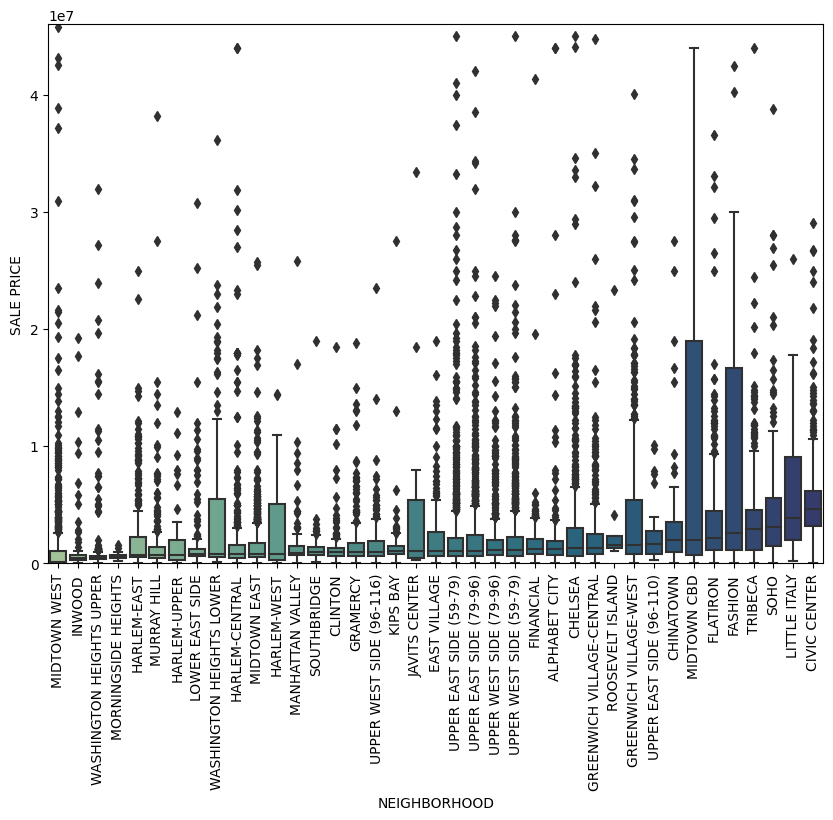

In [66]:
box_order = median_values['NEIGHBORHOOD']

mpl.figure(figsize=(10, 7))
sb.boxplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df, palette="crest", order=box_order)
mpl.xticks(rotation=90)
mpl.ylim(0, 46000000)
mpl.show()

In conclusion, the most expensive neighborhoods based on average sale price is Midtown CBD and Fashion. At the same time, Civic center, Little Italy and Soho have a high median sale price.

The least expensive neighborhood based on average sale price is Morningside Heights, while the least expensive neighborhood based on median price is Midtown west.

***
**Question 2: What is the relationship between the sales price and gross square feet?**

We start by removing instances where sale price or gross square feet is 0. Then we continue by plotting sale price and gross square feet

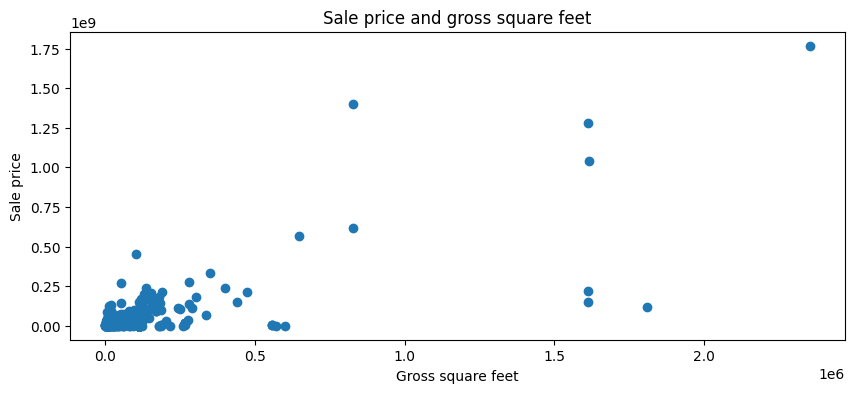

In [71]:
df = df_original.copy()
df.drop(df[df['SALE PRICE']==0].index, inplace=True)
df.drop(df[df['GROSS SQUARE FEET']==0].index, inplace=True)

x = df['GROSS SQUARE FEET']
y = df['SALE PRICE']


fig = mpl.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Gross square feet')
ax.set_ylabel('Sale price')
ax.set_title('Sale price and gross square feet')

ax.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'])
mpl.show()

Now we want to ignore the outliers. And we add a regression line.

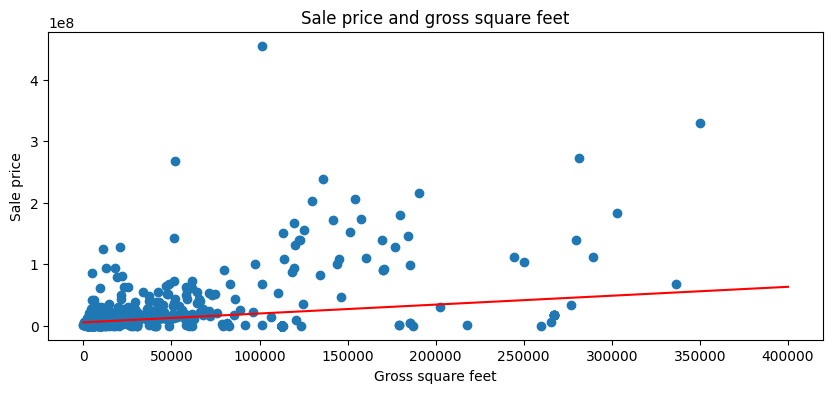

In [95]:
df = df_original.copy()
df.drop(df[df['SALE PRICE']==0].index, inplace=True)
df.drop(df[df['GROSS SQUARE FEET']==0].index, inplace=True)
df.drop(df[df['GROSS SQUARE FEET']>400000].index, inplace=True)

x = df['GROSS SQUARE FEET']
y = df['SALE PRICE']

data_linreg = np.polyfit(x,y,1)
xp = np.linspace(0, 400000, 10)
lr = np.polyval(data_linreg, xp)

fig = mpl.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Gross square feet')
ax.set_ylabel('Sale price')
ax.set_title('Sale price and gross square feet')

ax.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'])
ax.plot(xp,lr,color='red')

mpl.show()

In conclusion, there is a relation between gross square feet and sale price, where more square feet results in a higher price. But it is not a very obvious relationship.

### 2012 Olympics dataset

**Question 1: What can you say about the relationship between a country’s population and the number of medals it wins?**

Firstly we load the data, then we add a columns for total number of medals. We look at the entire dataset, and in the second plot we show countries with a population of less than a hundred million.

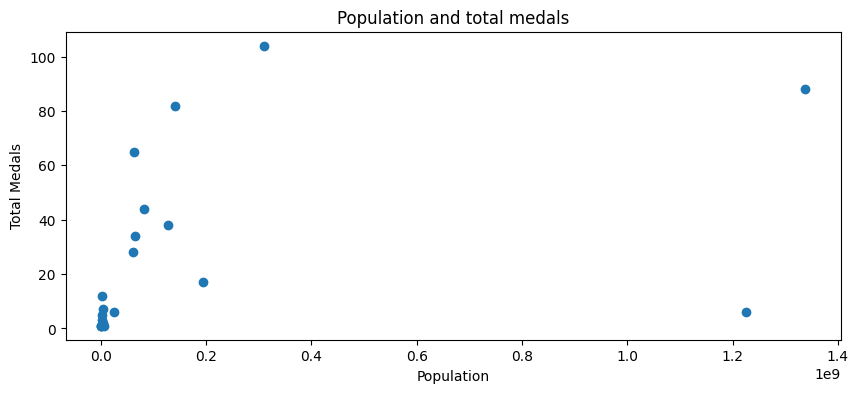

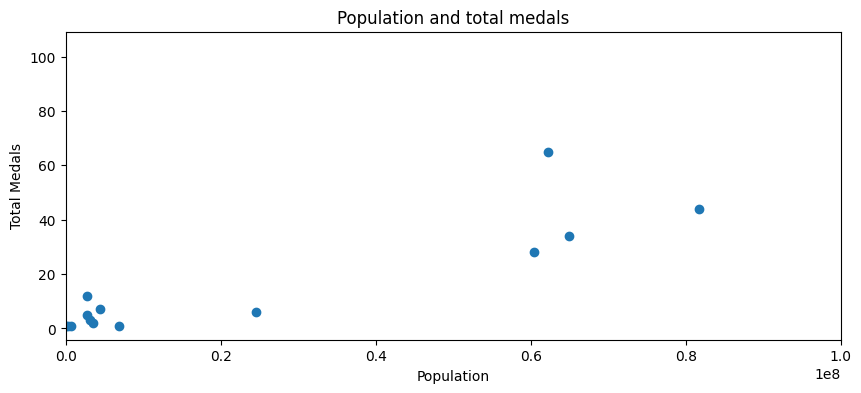

In [103]:
df = pd.read_csv('olympics.csv')
df['Total medals'] = df['Bronze medals']+df['Silver medals']+df['Gold medals']
fig = mpl.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Population')
ax.set_ylabel('Total Medals')
ax.set_title('Population and total medals')

ax.scatter(df['2010 population'], df['Total medals'])
mpl.show()

fig = mpl.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Population')
ax.set_ylabel('Total Medals')
ax.set_title('Population and total medals')
ax.set_xlim(0,100000000)
ax.scatter(df['2010 population'], df['Total medals'])
mpl.show()


From the scatter plot we can say a few things: A population with less than 40 million people is unlikely to win more than 20 medals in total. Furthermore, a population of greater than one billion is not a guarantee for many medals.

**Question 2: What can you say about the relationship between the ratio of female and male counts and the GDP of that country?**

We calculate the female/male ratio. Then we do a scatter plot with that and the GDP.

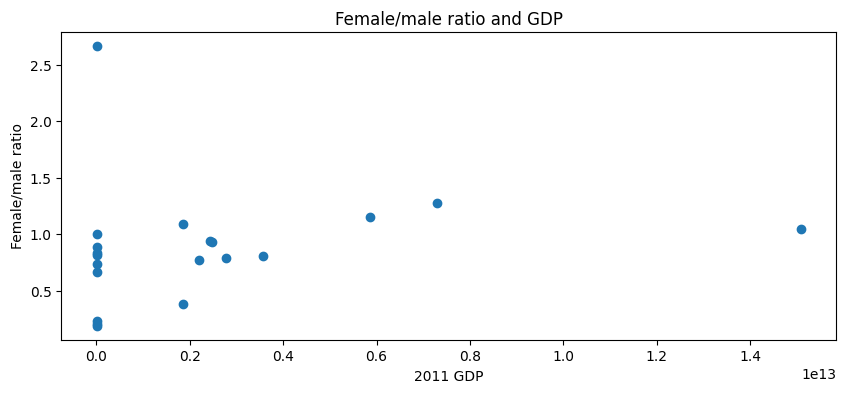

In [115]:
df = pd.read_csv('olympics.csv')
df['ratio'] = df['Female count']/df['Male count']

fig = mpl.figure(figsize=(10, 4))
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('Female/male ratio')
ax.set_xlabel('2011 GDP')
ax.set_title('Female/male ratio and GDP')
ax.scatter(df['2011 GDP'], df['ratio'])
mpl.show()

From the graph we can see that a countries with a higher GDP generally seem to have a higher female/male ratio. 

***
## 2.
**What is a time series? Explain the meaning of trends effects, seasonal
variations, and random error.**

A time series is a collection of data points that has been gathered over some time period. A trend is a pattern that can be seen over a certain amount of time. Seasonal variations are trends that repeat themselves seasonally. For example, in a time series with data on outside temperature over several years, a pattern should repeat itself yearly. A random error can be a data point that is simply wrong, which could for instance be caused by a faulty sensor.

## 3. 

**Your company manufactures and distributes soft drink beverages, sold
in bottles and cans at retail outlets such as grocery stores, restaurants
and other eating/drinking establishments, and vending machines in offices,
schools, stores, and other outlets. Your product line includes about 25
different products and many of these are produced in different package
sizes.**

**a. What forecasts do you need in this business to be successful?**

One useful forecast would be what products are sold at what time of year. Related to this would be a forecast on weather patterns, since some drinks could be sold more during certain weathers. Another important forecast is sales for each product, so that you know if a product should be removed, or if a product requires a greater production capacity. Another possible forecast could be the cost of ingredients. Some ingredients may go up in price over time, and in order to stay profitable it may be necessary to increase the price of the product.

**b. Is the demand for your product likely to be seasonal? Explain why or why not.**

Yes. For instance, some establishements, such as schools, has a lower demand during the summer. At the same time resturants probably have a higher demand during the summer. Some beverages are likely more popular during the summer, while others are more popular during the winter.


**c. Does the shelf life of your product impact the forecasting problem?**

Yes. If a beverage can be stored for a long time without going bad, an overproduction does not cause a loss of capital. But if the beverage has a short shelf life, and you have an overproduction, you will loose money.

**d. What data do you think that you would need to be able to produce successful forecasts?**

For each beverage you would need data on when it is sold (during what seasons), the cost of producing it and its selling price. It could also be useful to see where the drink is popular and data on the customers who drink each beverage.
